# **Project Overview**

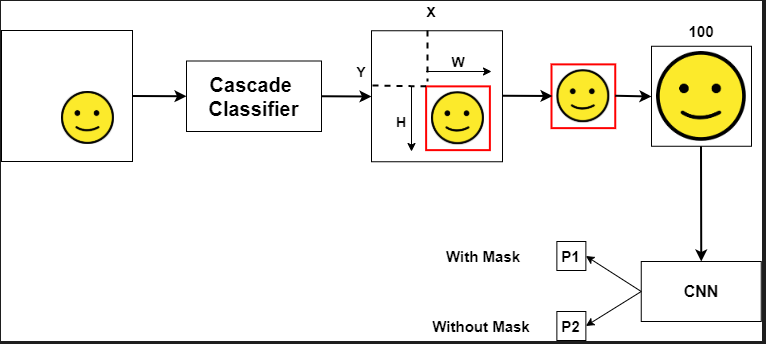

# The Dataset

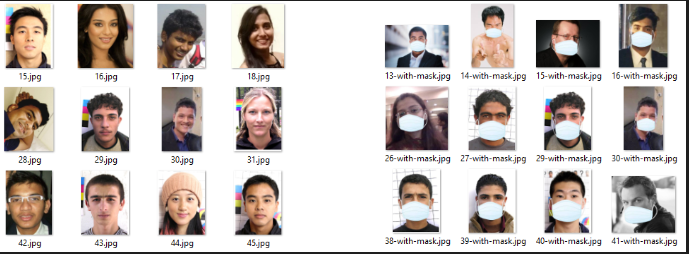

# Data Processing

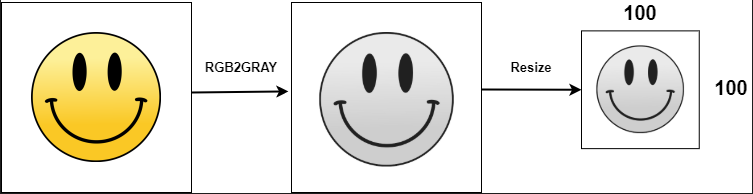

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]
Preprocessing done successfully!


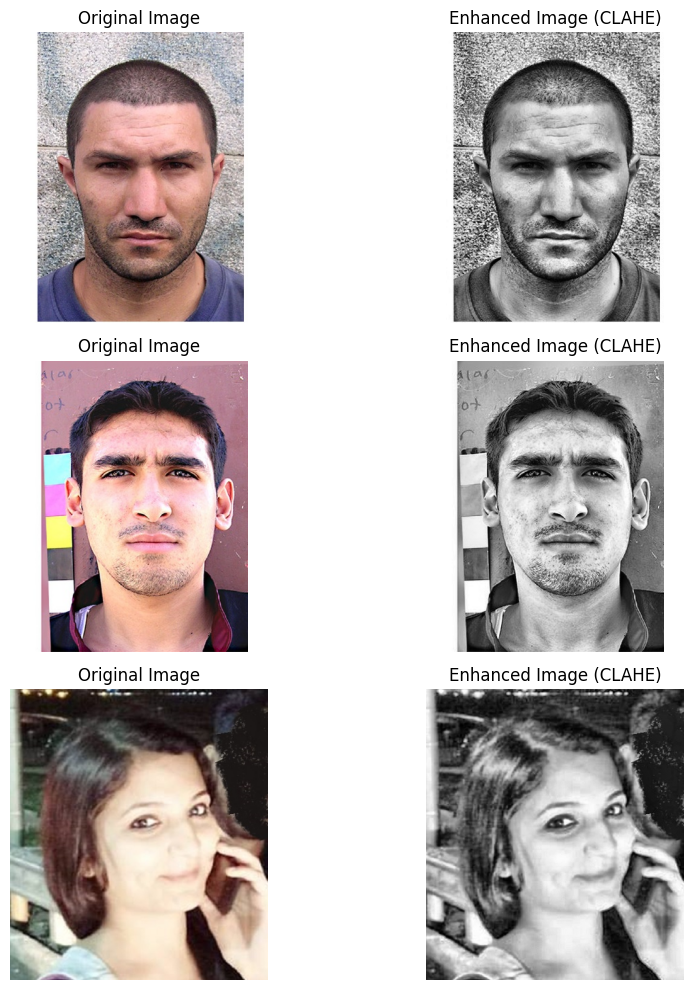

In [ ]:
import cv2
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Function to enhance contrast
def enhance_contrast(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced_img = clahe.apply(gray)
    return enhanced_img

# Path setup
data_path = '/content/drive/MyDrive/data'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories, labels))

print(label_dict)
print(categories)
print(labels)

img_size = 100
data = []
target = []

# Load images, apply enhancement, and resize
sample_images = []  # Store sample images for visualization

for category in categories:
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)

    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)

        try:
            enhanced = enhance_contrast(img)  # Apply contrast enhancement
            resized = cv2.resize(enhanced, (img_size, img_size))
            data.append(resized)
            target.append(label_dict[category])

            # Save sample images for visualization
            if len(sample_images) < 3:
                sample_images.append((img, enhanced))

        except Exception as e:
            print('Exception:', e)

# Convert to NumPy arrays
data = np.array(data) / 255.0
data = np.reshape(data, (data.shape[0], img_size, img_size, 1))
target = np.array(target)

# Convert labels to one-hot encoding
new_target = to_categorical(target)

print("Preprocessing done successfully!")
np.save('data', data)
np.save('target', new_target)

# Display sample images before and after enhancement
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, (original, enhanced) in enumerate(sample_images):
    axes[i, 0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(enhanced, cmap='gray')
    axes[i, 1].set_title("Enhanced Image (CLAHE)")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()
